In [157]:
#W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do 
#stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na 
#następujące pytania:

#Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy 
#(PerformanceScore)?

#Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

#Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

#Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

#Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
#Użyj bazy danych znajdującej się tutaj. Przygotuj odpowiednie zestawienia i wizualizacje, a następnie sformułuj swoją opinię na temat wyżej
#wymienionych kwestii. Rozwiązanie prześlij Mentorowi do oceny.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

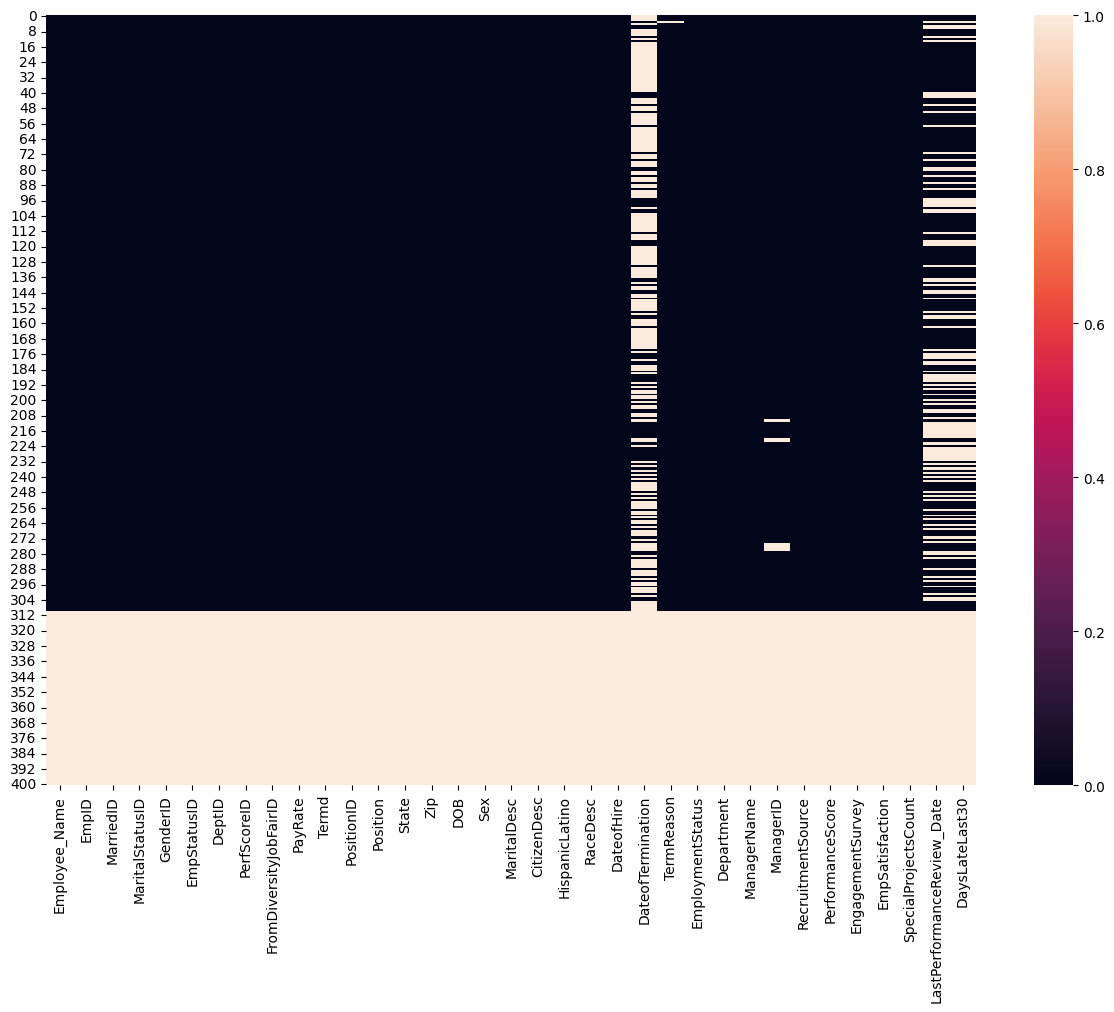

In [160]:
df.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [161]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [162]:
df.dropna(thresh=2,inplace=True)

In [163]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [164]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [165]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df[['Employee_Name','DOB']]

,Employee_Name,DOB
0,"Brown, Mia",1987-11-24
1,"LaRotonda, William",1984-04-26
2,"Steans, Tyrone",1986-09-01
3,"Howard, Estelle",1985-09-16
4,"Singh, Nan",1988-05-19
...,...,...
305,"Daniele, Ann",2052-01-18
306,"Lajiri, Jyoti",1986-04-23
307,"Semizoglou, Jeremiah",1983-02-09
308,"South, Joe",2065-09-09


In [166]:
# Korekta - jeśli lata są błędne (>2024), zmień je na XX wieku
df['DOB'] = df['DOB'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2024 else x)
df[['Employee_Name','DOB']]

,Employee_Name,DOB
0,"Brown, Mia",1987-11-24
1,"LaRotonda, William",1984-04-26
2,"Steans, Tyrone",1986-09-01
3,"Howard, Estelle",1985-09-16
4,"Singh, Nan",1988-05-19
...,...,...
305,"Daniele, Ann",1952-01-18
306,"Lajiri, Jyoti",1986-04-23
307,"Semizoglou, Jeremiah",1983-02-09
308,"South, Joe",1965-09-09


In [167]:

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']]

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
...,...,...,...
305,NaT,1952-01-18,2014-11-10
306,NaT,1986-04-23,2014-11-10
307,NaT,1983-02-09,2016-06-30
308,NaT,1965-09-09,2014-11-10


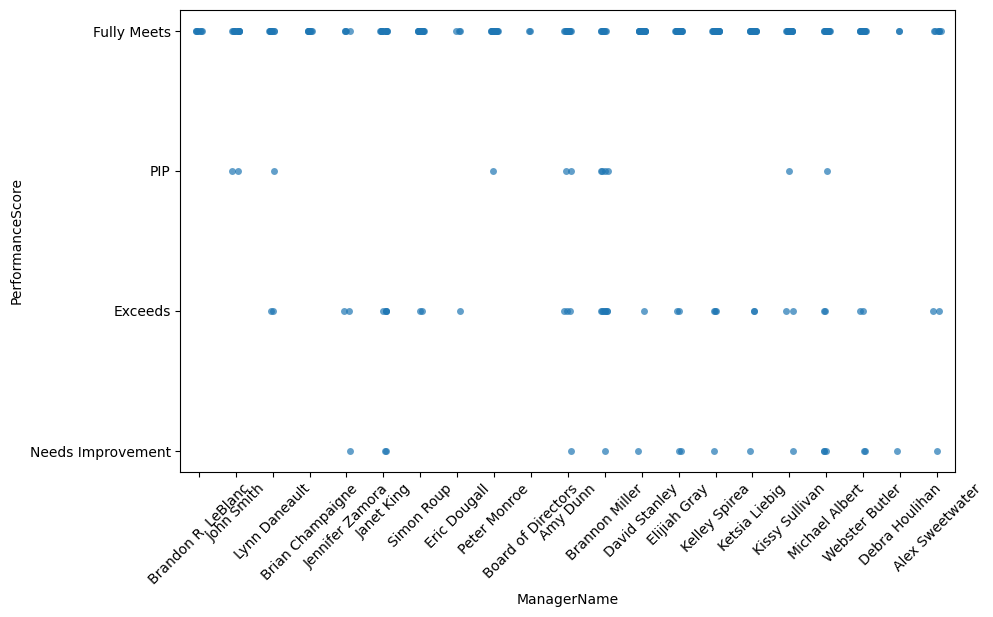

In [168]:
#Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy 
#(PerformanceScore)?
plt.figure(figsize=(10, 6))
sns.stripplot(x="ManagerName", y="PerformanceScore", data=df, jitter=True, alpha=0.7)
#sns.jointplot(x='ManagerName',y='PerformanceScore',data=df)
plt.xticks(rotation=45)
#plt.title("Performance Score Distribution by Manager")
plt.show()

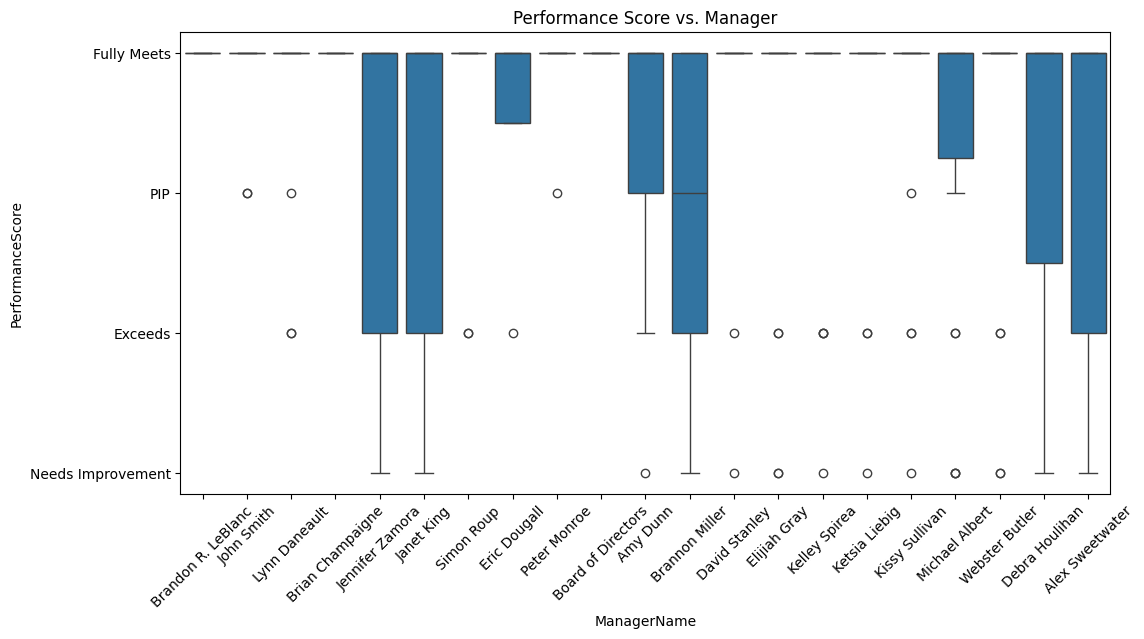

In [169]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="ManagerName", y="PerformanceScore", data=df)
plt.xticks(rotation=45)  # Obrócenie etykiet dla lepszej czytelności
plt.title("Performance Score vs. Manager")
plt.show()

In [170]:
a = df.groupby("ManagerName").count()
print(a['Employee_Name'])

ManagerName
Alex Sweetwater        9
Amy Dunn              21
Board of Directors     2
Brandon R. LeBlanc     7
Brannon Miller        21
Brian Champaigne       8
David Stanley         21
Debra Houlihan         3
Elijiah Gray          22
Eric Dougall           4
Janet King            19
Jennifer Zamora        7
John Smith            14
Kelley Spirea         22
Ketsia Liebig         21
Kissy Sullivan        22
Lynn Daneault         13
Michael Albert        22
Peter Monroe          14
Simon Roup            17
Webster Butler        21
Name: Employee_Name, dtype: int64


In [171]:
#Nie widać zależności między bezpośrednim przełożonym a wydajnością pracy. Najczęściej występującą oceną jest "Fully Meets", 
#co może sugerować, że większość pracowników jest oceniana pozytywnie, niezależnie od menedżera.


In [172]:
#Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
import datetime as dt


end_date = dt.datetime(2019,9,27)

# Obliczamy staż pracy w latach (licząc 365.25 dni w roku)
df['Seniority'] = (df['DateofTermination'].fillna(end_date) - df['DateofHire']).dt.days / 365.25

df[['DateofHire', 'DateofTermination', 'Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.915811
1,2014-01-06,NaT,5.722108
2,2014-09-29,NaT,4.993840
3,2015-02-16,2015-04-15,0.158795
4,2015-05-01,NaT,4.407940


In [173]:
sorted_count = df.groupby("RecruitmentSource")["Seniority"].count().sort_values(ascending=False)
sorted_count

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word of Mouth                             13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Careerbuilder                              1
Company Intranet - Partner                 1
On-line Web application              

In [174]:
sorted_seniority = df.groupby("RecruitmentSource")["Seniority"].mean().sort_values(ascending=False)
sorted_seniority

RecruitmentSource
Careerbuilder                             8.481862
Other                                     6.453114
Billboard                                 5.862765
MBTA ads                                  5.729516
Website Banner Ads                        5.721476
Information Session                       5.623546
Professional Society                      5.437645
Employee Referral                         5.025899
Pay Per Click - Google                    5.009354
On-campus Recruiting                      5.006388
Monster.com                               4.834816
Internet Search                           4.711385
Newspager/Magazine                        4.593201
Diversity Job Fair                        4.492247
Search Engine - Google Bing Yahoo         4.360192
Glassdoor                                 4.155080
Vendor Referral                           4.143463
Word of Mouth                             3.647238
Social Networks - Facebook Twitter etc    3.464626
Indeed       

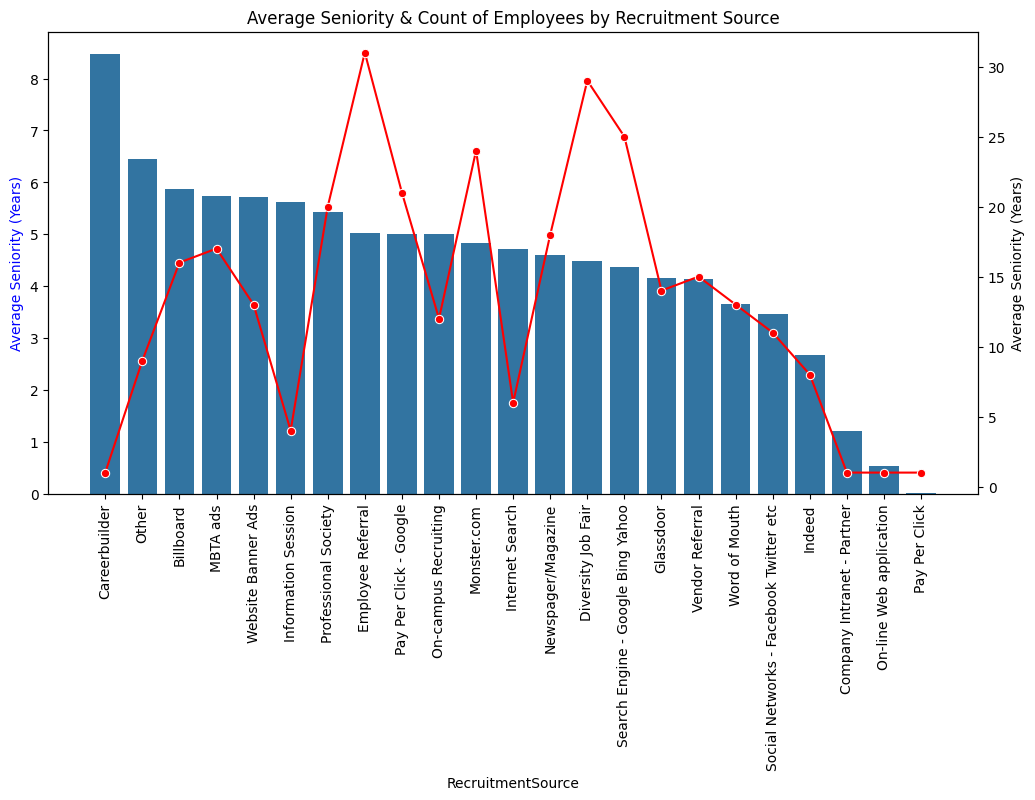

In [175]:

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
sns.barplot(x=sorted_seniority.index, 
            y=sorted_seniority.values)
ax1.set_ylabel("Average Seniority (Years)", color="blue")
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(x=sorted_count.index, 
             y=sorted_count.values, marker="o", color="red")

plt.ylabel("Average Seniority (Years)")
plt.title("Average Seniority & Count of Employees by Recruitment Source")
plt.show()




In [176]:
#Z danych wynika, że jeśli zależy nam na jak najdłuższym stażu pracowników to najlepszymi źródłami pozyskania pracownika są:Other, Bilbord, MBTA ads,
#Webside Ads. Pracownicy pozyskani z tych źródeł pracują średnio 5+ lat 

In [177]:
#Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
df.groupby("MaritalDesc")["EmpSatisfaction"].mean().sort_values()

MaritalDesc
Married      3.747967
Separated    3.833333
Single       3.970803
Divorced     4.033333
Widowed      4.250000
Name: EmpSatisfaction, dtype: float64

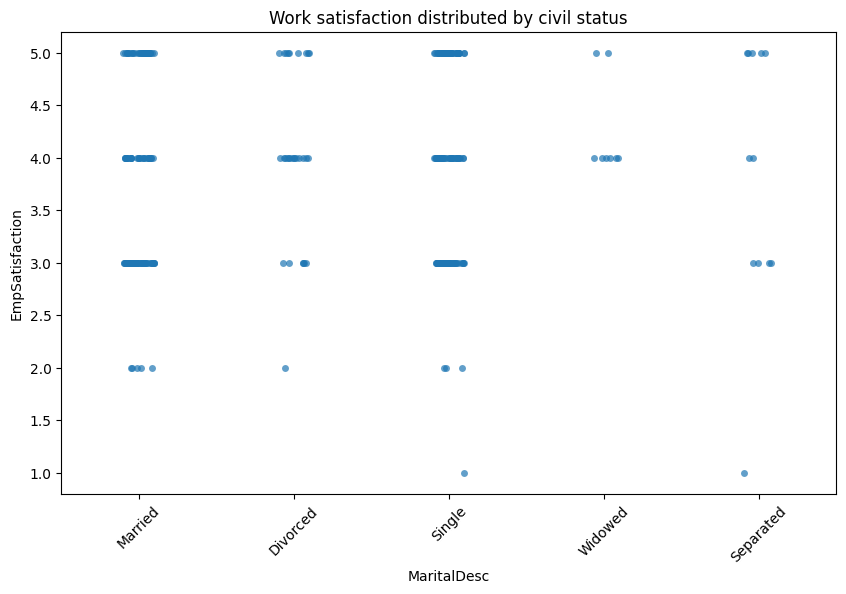

In [178]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="MaritalDesc", y="EmpSatisfaction", data=df, jitter=True, alpha=0.7)
#sns.jointplot(x='ManagerName',y='PerformanceScore',data=df)
plt.xticks(rotation=45)
plt.title("Work satisfaction distributed by civil status")
plt.show()

In [179]:
#Na podstawie samej analizy wykresu punktowego trudno jest jednoznacznie stwierdzić, czy istnieje silna korelacja między stanem cywilnym a 
#zadowoleniem z pracy. Wykres sugeruje, że zadowolenie z pracy jest zróżnicowane w obrębie każdej kategorii stanu cywilnego. Ze średniej wynika iż
#Widowed stanowia najbardziej zadowoloną grupę osób

In [180]:
#Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
df['DOB'].isnull().sum()

np.int64(0)

In [181]:
df['Age'] = (end_date - df['DOB']).dt.days/365.25
df['Age']

0      31.841205
1      35.419576
2      33.070500
3      34.028747
4      31.356605
         ...    
305    67.690623
306    33.429158
307    36.629706
308    54.047912
309    41.404517
Name: Age, Length: 310, dtype: float64

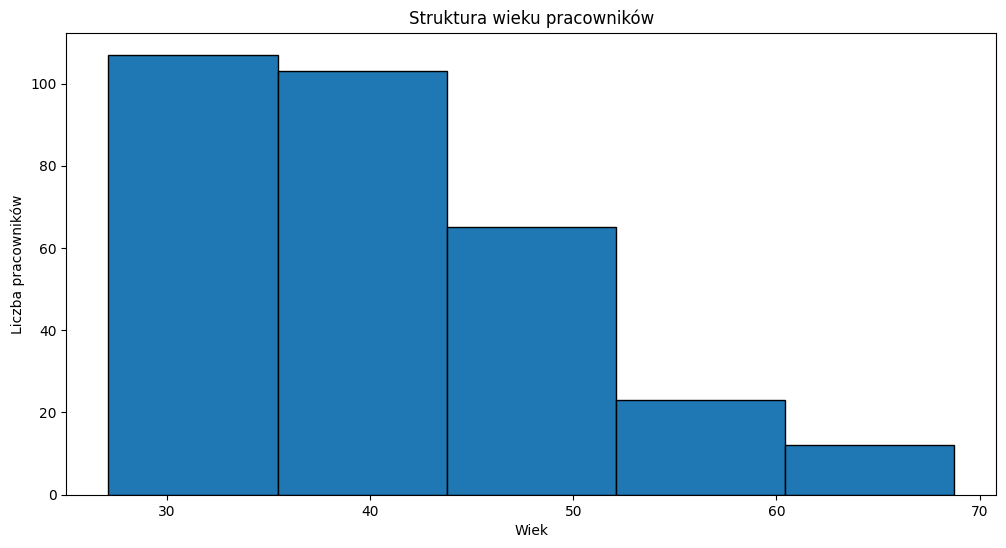

In [182]:
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=5, edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.title('Struktura wieku pracowników')
plt.show()

C:\Users\pzeleznicki\AppData\Local\Temp\ipykernel_1772\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

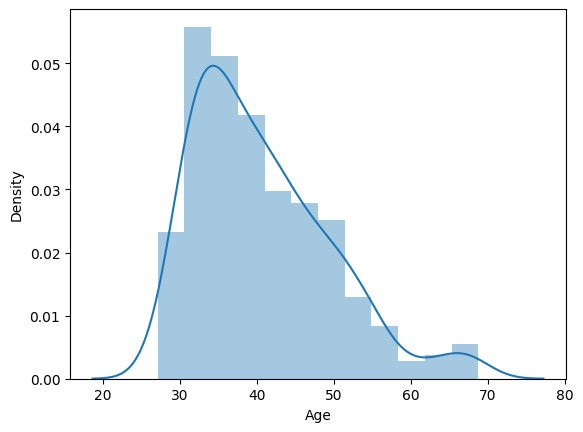

In [183]:
sns.distplot(df['Age'])

In [184]:
# Struktura wieku Najliczniejsza grupa wiekowa – Najwięcej pracowników znajduje się w przedziale ok. 30-35 lat, co oznacza, że firma ma stosunkowo młodą
#kadrę.Równomierny rozkład – Wiek pracowników jest dość zróżnicowany, ale największa koncentracja to osoby w wieku 30-40 lat.
#Mniejsza liczba starszych pracowników – Po 45. roku życia liczba pracowników spada, co może oznaczać, że firma zatrudnia mniej osób starszych.
# Firma nie zatrudnia osób bez skończonych studiów- brak osób urodzonych przed 26-27 rokiem zycia 

In [205]:
#Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
def age_group(x):
    if x < 30:
        return '20-30'
    elif 30 <= x < 35:
        return '30-34'
    elif 35 <= x < 40:
        return '35-39'
    elif 40 <= x < 45:
        return '40-44'
    elif 45 <= x < 50:
        return '45-49'
    else:
        return '50+'
        
special_projects = df[['Age','SpecialProjectsCount']].copy()
special_projects['Age_group'] = special_projects['Age'].apply(lambda x: age_group(x))
a = special_projects.groupby('Age_group')['SpecialProjectsCount'].mean().reset_index()                                                            
a


,Age_group,SpecialProjectsCount
0,20-30,0.500000
1,30-34,1.785714
2,35-39,1.164179
3,40-44,0.762712
4,45-49,1.325000
5,50+,0.913043


In [204]:
age_group_count =special_projects['Age_group'].value_counts()
age_group_count

Age_group
30-34    84
35-39    67
40-44    59
50+      46
45-49    40
20-30    14
Name: count, dtype: int64

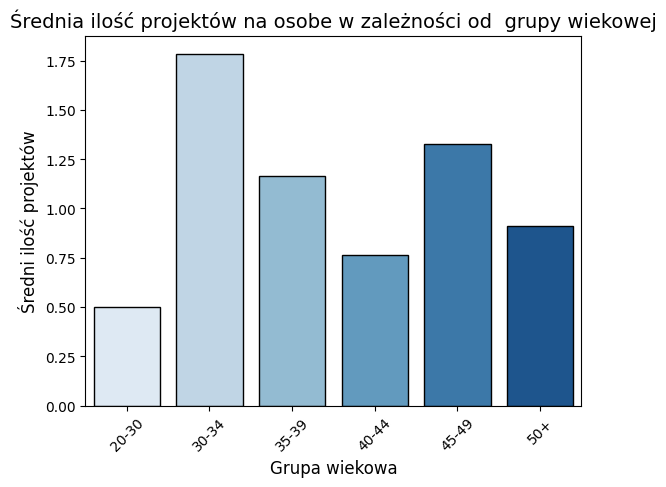

In [206]:
sns.barplot(x=a['Age_group'], y=a['SpecialProjectsCount'], hue =a['Age_group'],  palette='Blues', edgecolor='black')

# Dodanie tytułu i etykiet
plt.title('Średnia ilość projektów na osobe w zależności od  grupy wiekowej', fontsize=14)
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Średni ilość projektów', fontsize=12)
plt.xticks(rotation=45)

# Pokazanie wykresu
plt.show()

In [207]:
def age_group2(x):
    if x < 40:
        return '20-40'
    else:
        return '40+'
        
special_projects = df[df['Age'] > 0][['Age','SpecialProjectsCount']]
special_projects['Age_group'] = special_projects['Age'].apply(lambda x: age_group2(x))
a = special_projects.groupby('Age_group')['SpecialProjectsCount'].mean().reset_index()                                                            
a

,Age_group,SpecialProjectsCount
0,20-40,1.424242
1,40+,0.965517


In [188]:
# Starsi pracownicy średnio pracują nad mniejsza ilościa projektów niż młodsi. W większości największą ilością projektów obłożeni są pracownicy w
#wieku 30-34 lat. Stanowią też oni najliczniejszą grupę pracowników.